### Library Importing.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Problem #1

### Loading mushroom dataset.

In [3]:
df = pd.read_csv('./scikit_learn_data/agaricus-lepiota_data.csv')

In [5]:
df.columns

Index(['Class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-rint',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [103]:
df.isna().any()

Class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-rint    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

### Histogram Plotting.

In [6]:
def plotting(section):
    poison_class = ['p','e']
    item = section #'odor','gill-color'
    xdata, ydata = [], []
    for var in poison_class:
        temp = []
        for value in df[item].unique():
            x = value
            if value in df[df['Class']==var][item].unique():
                y = df[df['Class']== var][item].value_counts()[value]
                #print(var, value, df[df['Class']== var][item].value_counts()[value])
            else:
                y = 0
                #print(var, value , '0')
            if x not in xdata:
                xdata.append(x)
            temp.append(y)
        ydata.append(temp)
    pd.DataFrame(ydata, index = ['p','e'], columns = xdata).transpose().plot(kind = 'bar')
    plt.title('Histogram Chart on {}'.format(section.upper()))
    plt.xlabel('Variables')
    plt.ylabel('Counts')
    return plt.show()

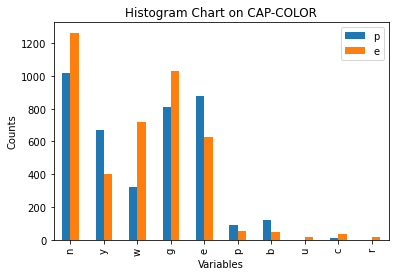

In [7]:
plotting('cap-color')

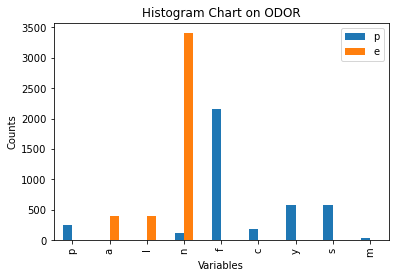

In [8]:
plotting('odor')

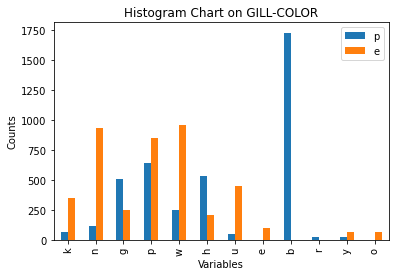

In [9]:
plotting('gill-color')

### Accucacy checking using 'odor' feature.

In [107]:
df_clustering = df.applymap(lambda x: ord(x))
df_clustering.drop(columns = ['Class'], inplace = True)

In [52]:
kmeans = KMeans(n_clusters = 2).fit(df_clustering[['gill-color','odor']])
labels = kmeans.labels_
print(kmeans.labels_)
print(' ')
df['Class']

[1 0 0 ... 0 1 0]
 


0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: Class, Length: 8124, dtype: object

In [53]:
dic = {1:'p',0:'e'}
match = 0
for i in range(len(labels)):
    if dic[labels[i]] == df['Class'][i]:
        match +=1
print('Accuracy is {}%'.format(match/8124*100))

Accuracy is 76.36632200886262%


In [45]:
kmeans = KMeans(n_clusters = 2).fit(df_clustering[['cap-color','gill-color']])
labels = kmeans.labels_
print(kmeans.labels_)
print(' ')
df['Class']

[1 0 0 ... 0 1 0]
 


0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: Class, Length: 8124, dtype: object

In [46]:
dic = {1:'p',0:'e'}
match = 0
for i in range(len(labels)):
    if dic[labels[i]] == df['Class'][i]:
        match +=1
print('Accuracy is {}%'.format(match/8124*100))

Accuracy is 61.644510093549975%


In [54]:
kmeans = KMeans(n_clusters = 2).fit(df_clustering[['cap-color','odor']])
labels = kmeans.labels_
print(kmeans.labels_)
print(' ')
df['Class']

[1 0 0 ... 1 1 1]
 


0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: Class, Length: 8124, dtype: object

In [55]:
dic = {1:'p',0:'e'}
match = 0
for i in range(len(labels)):
    if dic[labels[i]] == df['Class'][i]:
        match +=1
print('Accuracy is {}%'.format(match/8124*100))

Accuracy is 46.430329886755295%


### Elbow Method.

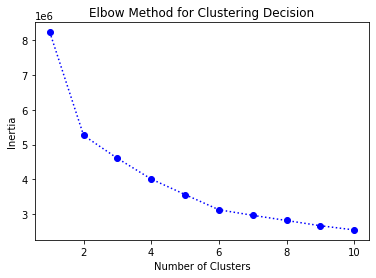

In [59]:
cost = []
for i in range(1,11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(df_clustering)
    cost.append(KM.inertia_)

plt.plot(range(1,11), cost, 'o', color = 'b', linestyle = ':')
plt.title('Elbow Method for Clustering Decision')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Clustering with 2 clusters, with all features.

In [63]:
kmeans = KMeans(n_clusters = 2).fit(df_clustering)
centers = kmeans.cluster_centers_
print(kmeans.cluster_centers_)
print(' ')
labels = kmeans.labels_
print(kmeans.labels_)
print(' ')
print(kmeans.inertia_)

[[110.94826364 112.37632884 110.11339476 109.89794472 106.40184266
  101.98405386 102.62863218  99.49681077 110.89014883 108.654146
   99.23812899 111.86605245 112.15946137 113.67044649 113.59390503
  112.         119.00283487 111.09992913 109.46279235 107.66761162
  116.34372785 103.86109142]
 [109.27419355 116.63870968 106.81290323 103.08387097 111.85806452
  101.61290323 101.32258065 106.7483871  102.27741935 111.4516129
   63.         111.64516129 111.57419355 115.24516129 115.2
  112.         118.34193548 111.96774194 103.1483871  118.01290323
  115.18387097 107.08387097]]
 
[0 0 0 ... 1 1 1]
 
5261048.899234134


### Accucary calculation.

In [71]:
dic = {1:'p',0:'e'}
#dic = {0:'p',1:'e'}
match 
for i in range(len(labels)):
    if dic[labels[i]] == df['Class'][i]:
        match +=1
print('Accuracy is {}%'.format(match/8124*100))

Accuracy is 64.59871984244214%


### Clustering visualization.

In [90]:
df_unicode = df.applymap(lambda x: ord(x))
def cluster_plotting(col1,col2):
    c_x1, c_y1 = [],[]
    c_x2, c_y2 = [],[]
    for i in range(len(labels)):
        if labels[i] == 0:
            c_x1.append(df_unicode[col1][i])
            c_y1.append(df_unicode[col2][i])
        elif labels[i] == 1:
            c_x2.append(df_unicode[col1][i])
            c_y2.append(df_unicode[col2][i])
        else:
            print('Error')
    plt.plot(c_x1, c_y1, 'o', color = 'purple')
    plt.plot(c_x2, c_y2, 'o', color = 'green')
    plt.legend(['P','E'], loc = 'best')
    plt.xlabel('{}'.format(col1))
    plt.ylabel('{}'.format(col2))
    return plt.show()
#plt.plot(df_unicode['cap-color'],df_unicode['gill-color'], 'o')

In [91]:
def cluster_plotting_error(col1,col2):
    dic = {1:'p',0:'e'}
    c_x1, c_y1 = [],[]
    c_x2, c_y2 = [],[]
    e_x, e_y = [],[]
    for i in range(len(labels)):
        if dic[labels[i]] == df['Class'][i]:
            if labels[i] == 0:
                c_x1.append(df_unicode[col1][i])
                c_y1.append(df_unicode[col2][i])
            elif labels[i] == 1:
                c_x2.append(df_unicode[col1][i])
                c_y2.append(df_unicode[col2][i])
            else:
                print('Error')
        else:
            e_x.append(df_unicode[col1][i])
            e_y.append(df_unicode[col2][i])
    plt.plot(c_x1, c_y1, 'o', color = 'purple')
    plt.plot(c_x2, c_y2, 'o', color = 'green')
    plt.plot(e_x, e_y, 'o', color = 'red')
    plt.legend(['P','E','Error'],loc = 'best')
    plt.xlabel('{}'.format(col1))
    plt.ylabel('{}'.format(col2))
    return plt.show()

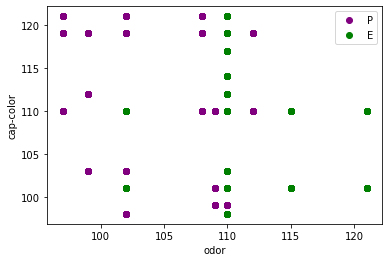

In [92]:
cluster_plotting('odor','cap-color')

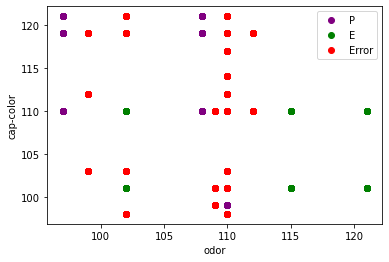

In [93]:
cluster_plotting_error('odor','cap-color')

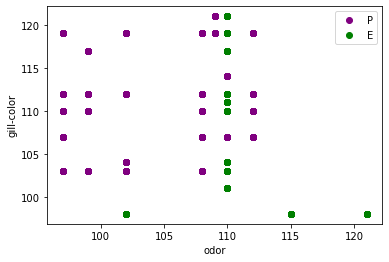

In [99]:
cluster_plotting('odor','gill-color')

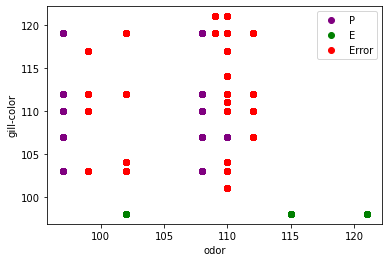

In [100]:
cluster_plotting_error('odor','gill-color')

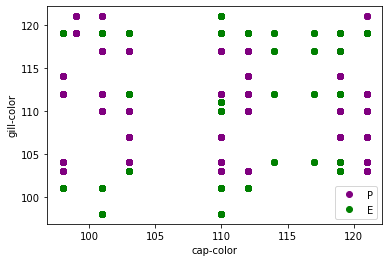

In [101]:
cluster_plotting('cap-color','gill-color')

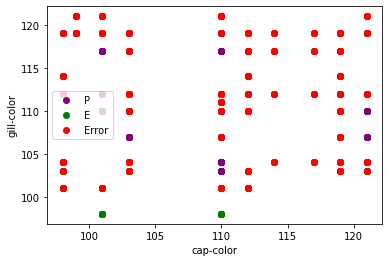

In [102]:
cluster_plotting_error('cap-color','gill-color')

# Problem #2

### Loading iris dataset.

In [104]:
iris = load_iris()
iris_data = iris.data
iris_class= iris.target

### Performing Decision Tree with iris dataset

Accuracy rate = 0.94737
 
[[14  0  0]
 [ 0  9  2]
 [ 0  0 13]]
 


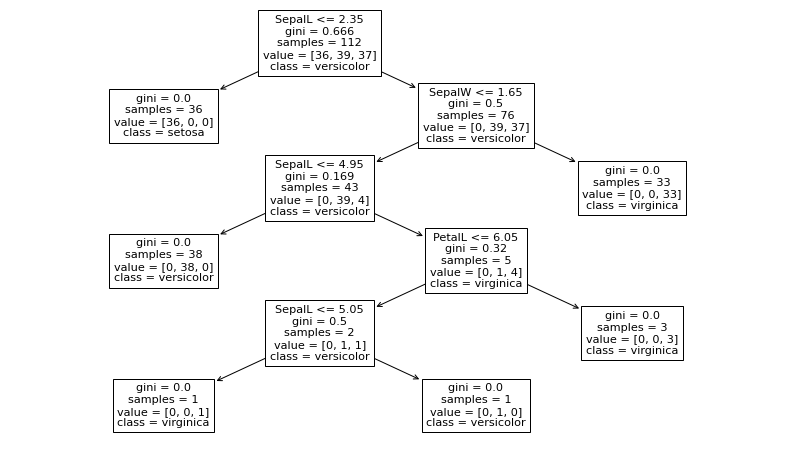

In [106]:
#default test data size: 25%
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_class)

#Training with DevisionTree algorithm
irisDT = tree.DecisionTreeClassifier().fit(X_train, y_train)
class_prediction = irisDT.predict(X_test)

#Calculating accuracy
ac_score = metrics.accuracy_score(y_test, class_prediction)
print(f'Accuracy rate = {ac_score:.5f}')
print(' ')

confusion = metrics.confusion_matrix(y_true=y_test, y_pred=class_prediction)
print(confusion)
print(' ')

plt.figure(figsize = (14,8))
tree.plot_tree(irisDT.fit(X_train, y_train), 
               feature_names = ['PetalL','PetalW','SepalL','SepalW'],
              class_names = {0: 'setosa', 1: 'versicolor', 2: "virginica"})
plt.show()

### Checking the mean accuracy of decision tree with 2000 iterations.

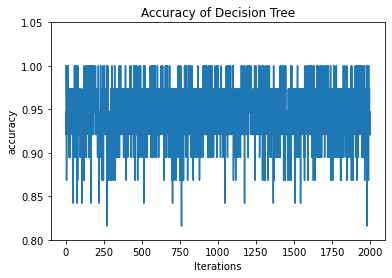

Average accuracy of Decision Tree is 94.68552631578947%


In [126]:
score = []
for i in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_class)
    irisDT = tree.DecisionTreeClassifier().fit(X_train, y_train)
    class_prediction = irisDT.predict(X_test)
    score.append(metrics.accuracy_score(y_test, class_prediction))

plt.plot(range(0,2000),score, )
plt.title('Accuracy of Decision Tree')
plt.ylim(0.8,1.05)
plt.xlabel('Iterations')
plt.ylabel('accuracy')
plt.show()
print('Average accuracy of Decision Tree is {}%'.format(np.array(score).mean()*100))

In [121]:
pd.DataFrame(score).describe()

,0
count,2000.000000
mean,0.945803
std,0.032675
min,0.789474
25%,0.921053
50%,0.947368
75%,0.973684
max,1.000000


### Performing Random Forest Classification with iris dataset

0.9736842105263158
[[17  0  0]
 [ 0 13  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93         7

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[0.11678629 0.03863122 0.38179517 0.46278732]


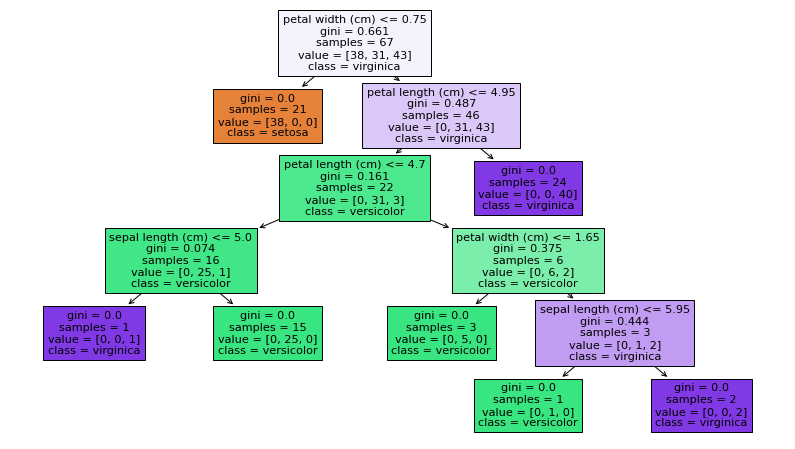

In [113]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_class)

#Learning
irisRFC = RandomForestClassifier().fit(X_train, y_train)

#Prediction
predict = irisRFC.predict(X_test)

#Accuracy
ac_score = metrics.accuracy_score(y_test, predict)
print(ac_score)
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predict)
print(confusion)
cl_report = metrics.classification_report(y_test, predict)
print(cl_report)
print(irisRFC.feature_importances_)

plt.figure(figsize = (14,8))
tree.plot_tree(irisRFC.estimators_[3], 
               feature_names = iris.feature_names,
               class_names = iris.target_names, filled = True)
plt.show()

### Checking the mean accuracy of random forest classification with 2000 iterations.

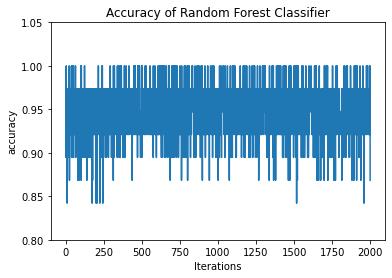

Average accuracy of random forest classification is 94.94605263157894%


In [122]:
score = []
for i in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_class)
    irisRFC = RandomForestClassifier().fit(X_train, y_train)
    class_prediction = irisRFC.predict(X_test)
    score.append(metrics.accuracy_score(y_test, class_prediction))

plt.plot(range(0,2000),score)
plt.title('Accuracy of Random Forest Classifier')
plt.ylim(0.8,1.05)
plt.xlabel('Iterations')
plt.ylabel('accuracy')
plt.show()
print('Average accuracy of random forest classification is {}%'.format(np.array(score).mean()*100))

In [124]:
pd.DataFrame(score).describe()

,0
count,2000.000000
mean,0.949461
std,0.030834
min,0.842105
25%,0.921053
50%,0.947368
75%,0.973684
max,1.000000


### Comparing decision tree and random forest classification.
Overall, both models showed outstanding performance, having accuracy around 94.5%. In detail, decision tree had mean accuracy of 94.58% and random forest classifier had mean accuracy of 94.94%. If we look at the standard deviation of both model's accuracy, random forest model had lower standard deviation (s.d. of decision tree = 0.032, s.d. of random forest classification = 0.031). However, performing 2000 times of random forest classification took much longer time compared to  decision tree classification. Overall, random forest classification showed slightly better performance, but decision tree classification is also good model to be used.